In [8]:
import keras
keras.__version__

'2.11.0'

In [20]:
from keras import layers 
from keras import models

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(247, 409, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 245, 407, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 122, 203, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 120, 201, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 60, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 58, 98, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 29, 49, 128)     

In [64]:
from keras import optimizers

In [65]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [66]:
model.save('cats_and_dogs_small_1.h5')

In [67]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 245, 407, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 122, 203, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 120, 201, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 60, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 58, 98, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 29, 49, 128)     

In [68]:
img_path = r'C:\Users\User\PycharmProjects\pythonProject\yolococo\output.jpg'

In [69]:
from keras.utils import image_utils
import numpy as np

img = image_utils.load_img(img_path,target_size=(247,409))
img_tensor = image_utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)

img_tensor /=255.

print(img_tensor.shape)

(1, 247, 409, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

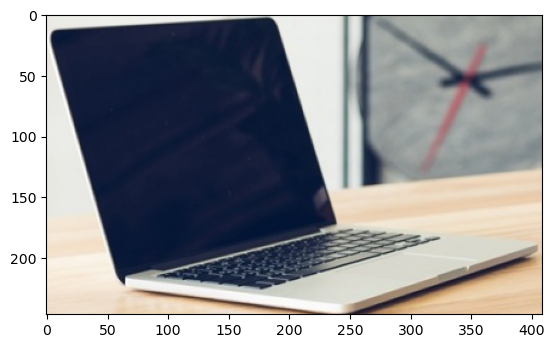

In [70]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show

In [71]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [72]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 72ms/step


In [73]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 245, 407, 32)


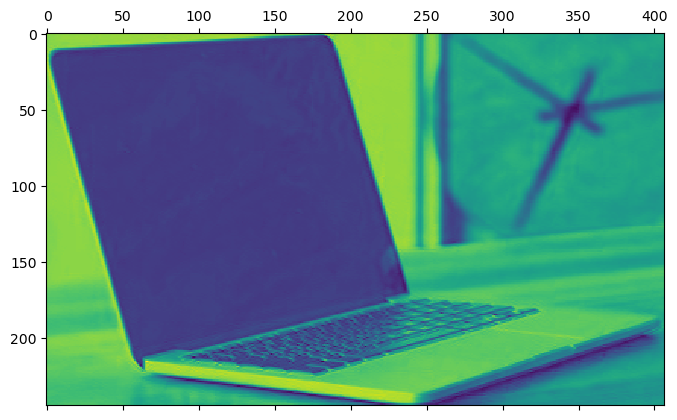

In [74]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

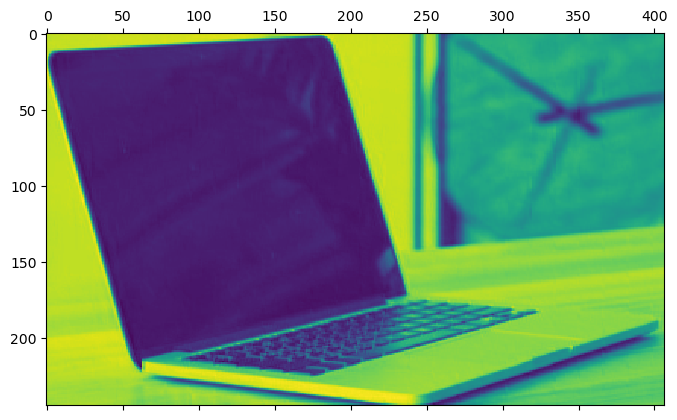

In [89]:
plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')
plt.show()